## 1.导入所需要的的模块

In [100]:
import numpy as np                     # 科学计算库，处理多维数组，进行数据分析
import pandas as pd                    # 基于 NumPy 的一种解决数据分析任务工具
import matplotlib.pyplot as plt        # 提供一个类似 Matlab 的绘图框架

### 1.导入数据集

In [101]:
data = pd.read_csv('ex1data1.txt',names=['population','profit']) # 读取文件，指定列名

可以用data.head()和data.tail()查看数据集的前几组数据和倒数几组数据：

In [102]:
data.head()   #查看前几组数据

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [103]:
data.tail()   #查看后几组数据

,population,profit
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


### 2.数据可视化

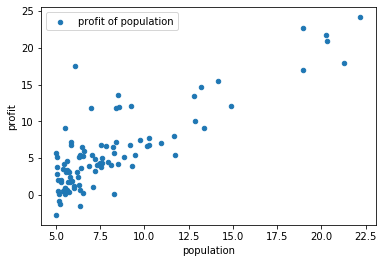

In [104]:
data.plot.scatter('population','profit',label='profit of population') # 绘制散点图
plt.show()                                                            #利润与人口分布散点图

## 2.构造数据集

已知单变量线性回归的假设函数为：
                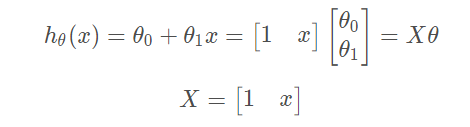

### 1.获取数据集中的输入向量X，需要在数据集加入x0 = 1的一列

In [105]:
data.insert(0,'$x_0$',1)    # 在data第0列插入列名为x_0值为 1 的列

用 data.head() 验证下是否插入：

In [106]:
data.head()

,$x_0$,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


### 2.通过切片操作获取输入向量和输出向量：

In [107]:
cols = data.shape[1]         # 获取 data 的列数
X = data.iloc[:,0:cols-1]    # X 为 0~cols-1列，所有行
y = data.iloc[:,cols-1:cols] # y 为倒数第 1 列，所有行

用X.head()和y.head()验证：

In [108]:
X.head()    #特征矩阵

,$x_0$,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [109]:
y.head()   #标签矩阵

,profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


### 3.此时X和y的数据结构为DataFrame，需要转换为ndarray类型才能用于后续的矩阵操作：

In [110]:
X = X.values
y = y.values    #将X和y转化为矩阵

可以用 X.shape 和 y.shape 查看数组的维度：

In [111]:
X.shape

(97, 2)

In [112]:
y.shape

(97, 1)

### 4.初始化参数θ：θ的维度为（2,1）；初始化为0

In [113]:
theta = np.zeros((2,1))

## 3.代价函数

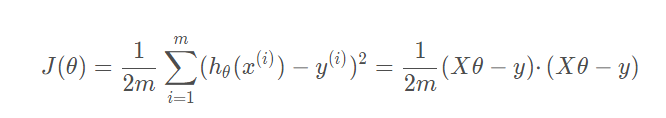

In [114]:
def costFunction(X, y, theta):
    inner = np.power(X @ theta - y, 2)  # power(*,2)使向量(Xθ-y)每一项平方，返回仍为向量
    return np.sum(inner) / (2 * len(X)) # 求向量每一项之和，结果相当于(Xθ-y)自身的内积

## 4.梯度下降函数

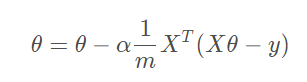

### 1.定义梯度下降函数：

In [115]:
def gradientDescent(X,y,theta,alpha,iters):                     # iters为梯度下降中的迭代次数
    costs = []                                                   # 将每次迭代的代价函数值保存在列表
    
    for i in range(iters):                                      #进行梯度下降
        theta = theta - (X.T @ (X@theta - y) ) * alpha / len(X)
        cost = costFunction(X, y, theta)
        costs.append(cost)
        
    if i % 100 == 0:                                           #每迭代 100 次打印一次cost
        print(cost)
        
    return theta,costs

### 2.给学习率alpha 和迭代次数iters赋上初值：

In [116]:
alpha = 0.02
iters = 20

In [117]:
theta,costs = gradientDescent(X,y,theta,alpha,iters) #返回迭代1000次后

### 3.绘制曲线图使代价函数可视化：

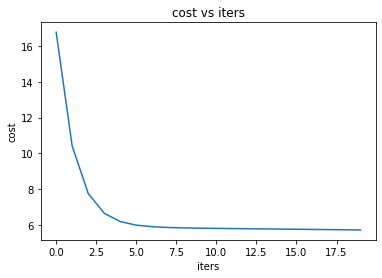

In [118]:
ig,ax = plt.subplots()       #创建绘图实例
ax.plot(np.arange(iters),costs)
ax.set(xlabel='iters',
       ylabel='cost',
      title='cost vs iters')
plt.show()

## 5.拟合直线可视化

### 1.绘制迭代后拟合的直线	，并与原始数据在同一坐标轴

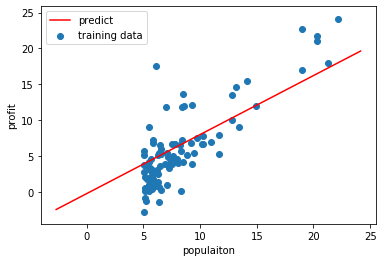

In [119]:
# 创建绘图实例
fig,ax = plt.subplots()

#绘制拟合直线
x = np.linspace(y.min(),y.max(),100)
y_ = theta[0,0] + theta[1,0] * x
ax.plot(x,y_,'r',label='predict')

#绘制原始数据散点图
ax.scatter(X[:,1],y,label='training data')

#显示直线和散点图的标签
ax.legend()

#设置横纵轴名
ax.set(xlabel='populaiton',
      ylabel='profit')
plt.show()

### 2.打印出theta即得到迭代后更新的参数值，然后给出新的population即可预测出其对应的profit